<a href="https://colab.research.google.com/github/srikanth703/SQL/blob/main/YULU_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YULU CASE STUDY**

***Problem Statement***

Yulu is a company in India that rents out electric cycles for short
trips. Their goal is to reduce traffic and make travel easier and more eco-friendly. Recently, Yulu's earnings have gone down. To find out why, they hired a consulting firm to help them understand what factors influence how many people use their electric cycles. They want to figure out what affects the demand for their service in the
Indian market.

**Import Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis (EDA)

In [35]:
# Import data file
df = pd.read_csv('bike_sharing.txt')

In [36]:
# Check first 5 records to understand data
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
# Statistics of data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [38]:
# Shape of data
df.shape

(10886, 12)

In [39]:
# Check Columns
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [40]:
# Data Types
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [41]:
# Change Categorical data to categories.
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


In [42]:
df.season.unique() , df.holiday.unique() , df.workingday.unique() , df.weather.unique()

(array([1, 2, 3, 4]), array([0, 1]), array([0, 1]), array([1, 2, 3, 4]))

In [43]:
# By seeing above data we can get an idea that season , holiday , workingday, weather
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [44]:
# Check whether data converted into categories or not
df.dtypes

,0
datetime,object
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [45]:
# Column Season has 4 attributes 1: Spring , 2: Summer , 3: Fall , 4:winter
df['season'].unique()
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df.season.unique()

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

In [46]:
df.holiday.value_counts()

,count
holiday,
0,10575
1,311


In [47]:
# For Holiday Category we can set 1 as Yes and 0 as No
df['holiday'] = df['holiday'].map({1: 'Yes', 0: 'No'})
df.holiday.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [48]:
# Similarly for Workingday we can set 1 as Yes and 0 as No
df['workingday'] = df['workingday'].map({1: 'Yes', 0: 'No'})
df.workingday.unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [49]:
df.weather.value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [50]:
# Similarly for weather we can Set 1:Clear , 2:Cloudy , 3:Light Rain , 4:Thunderstrome
df['weather'] = df['weather'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light_Rain', 4: 'Thunderstorm'})
df.weather.unique()
df.weather.value_counts()

,count
weather,
Clear,7192
Cloudy,2834
Light_Rain,859
Thunderstorm,1


In [51]:
# Missing Value Detection
df.isnull().sum() #No Null values so no action needed for this

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [52]:
# Statistical summary after converting data to categories
df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2012-12-19 23:00:00,Winter,No,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


**Univariate Analysis**

In [53]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

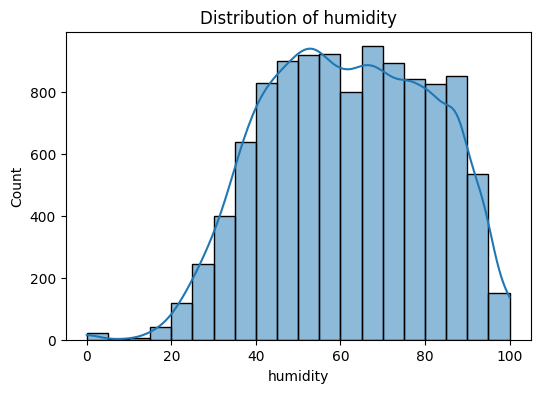

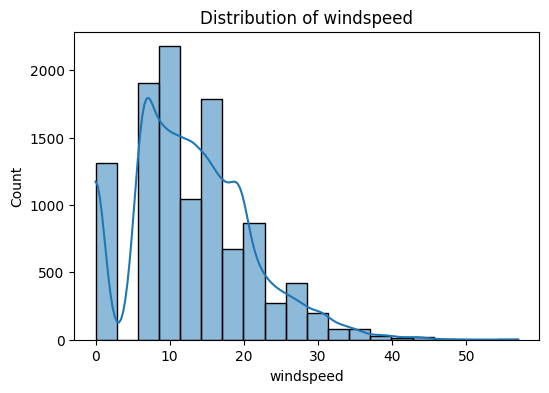

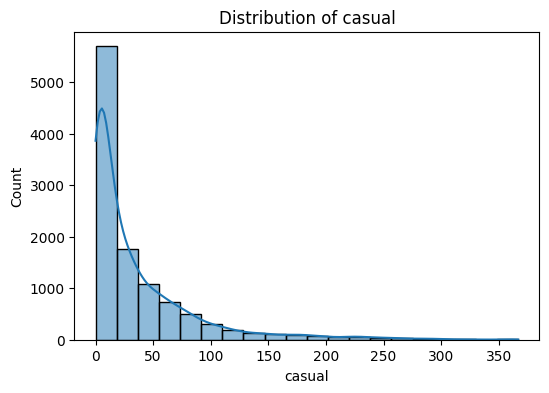

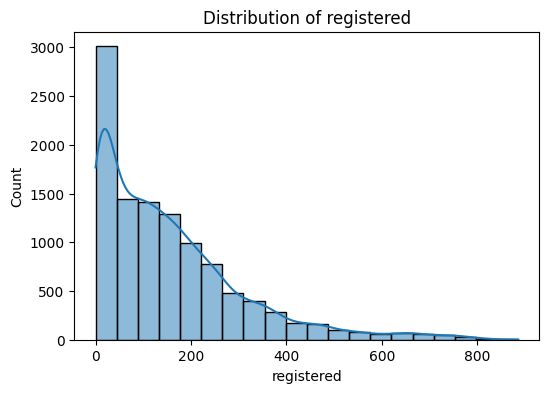

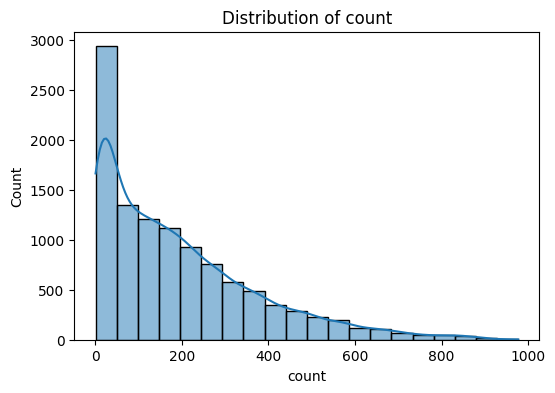

In [54]:
# Univariate analysis for Continuous columns
cont_cols = ['humidity', 'windspeed', 'casual', 'registered', 'count']
for col in cont_cols:
 plt.figure(figsize=(6, 4))
 sns.histplot(df[col], kde=True, bins=20)
 plt.title(f'Distribution of {col}')
 plt.show()

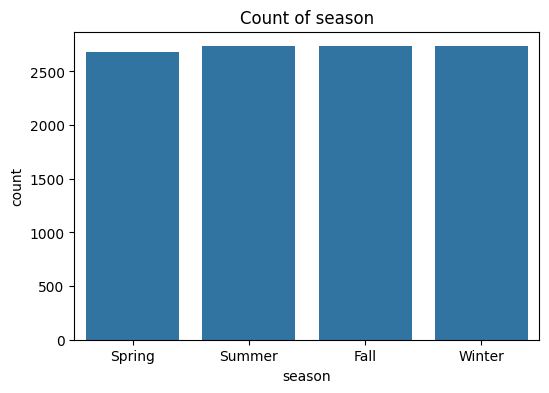

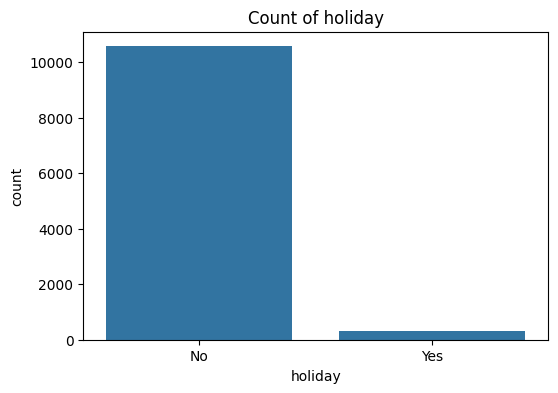

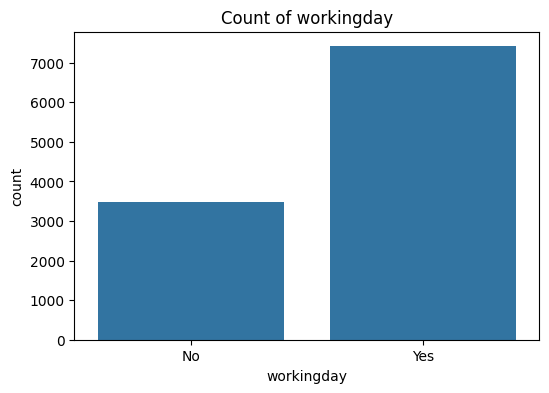

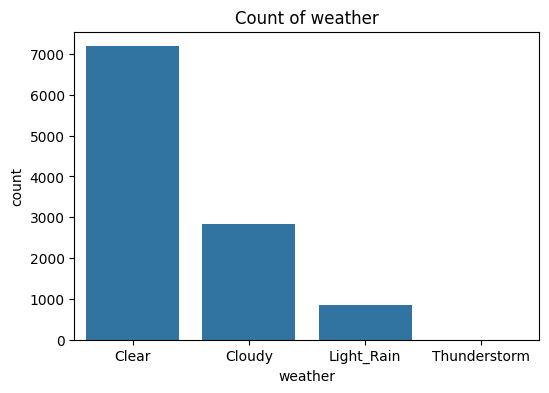

In [55]:
# Univariate analysis of all categorical fields one by one
cat_cols = ['season', 'holiday', 'workingday','weather']
for col in cat_cols:
 plt.figure(figsize=(6, 4))
 sns.countplot(data=df, x=col)
 plt.title(f'Count of {col}')
 plt.show

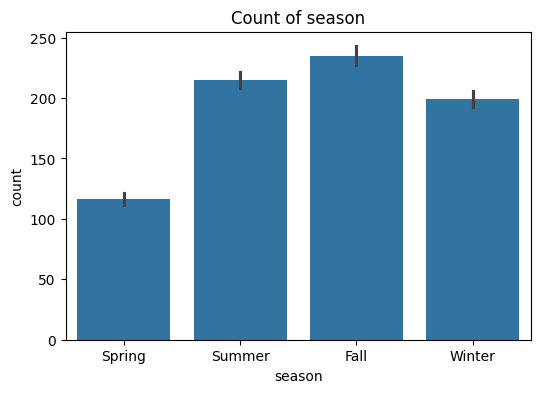

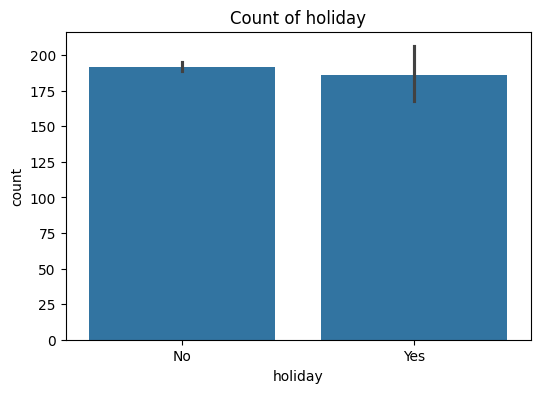

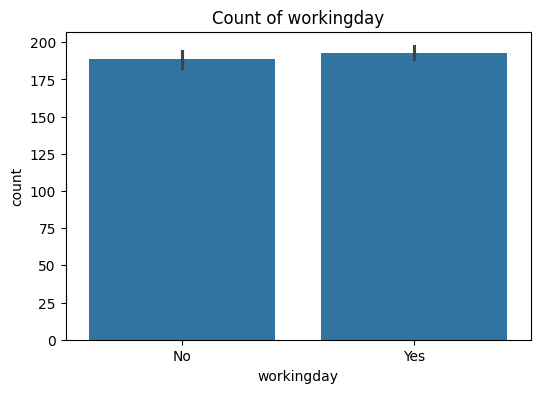

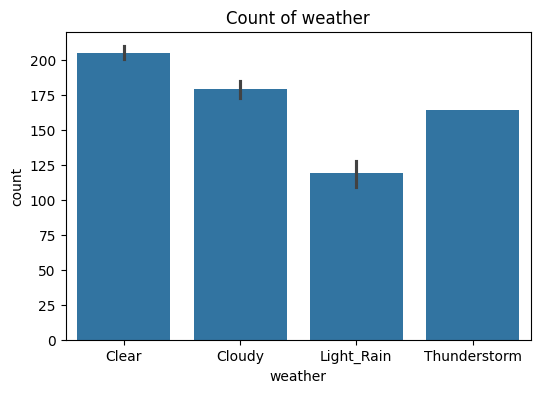

In [56]:
# Barplot for all categorical variables
cat_cols = ['season', 'holiday', 'workingday','weather']
for col in cat_cols:
 plt.figure(figsize=(6, 4))
 sns.barplot(data=df, x=col,y=df['count'])
 plt.title(f'Count of {col}')
 plt.show()

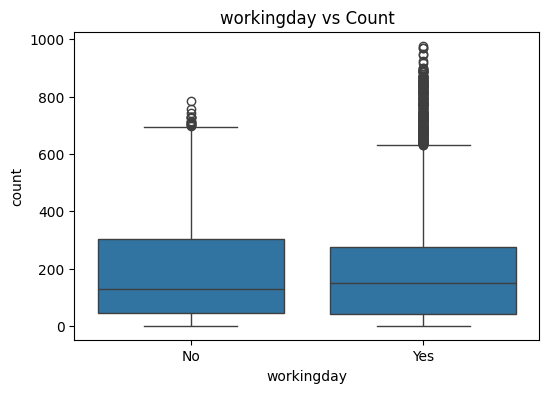

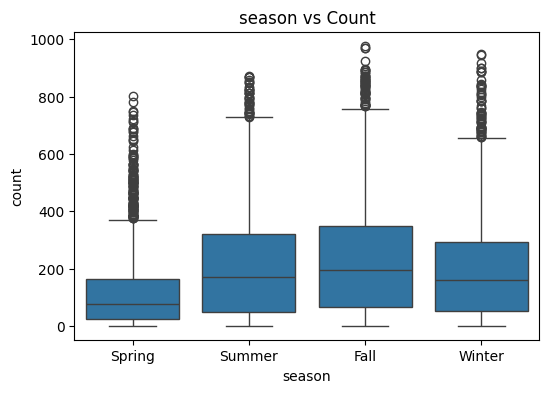

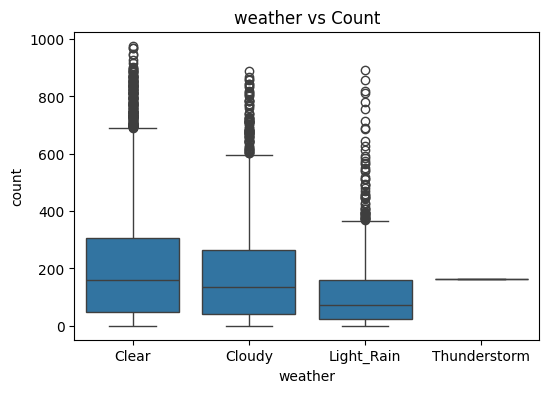

In [57]:
# Box Plot for Continuous vs categorical
for var in ['workingday', 'season', 'weather']:
 plt.figure(figsize=(6, 4))
 sns.boxplot(x=var, y='count', data=df)
 plt.title(f'{var} vs Count')
 plt.show()

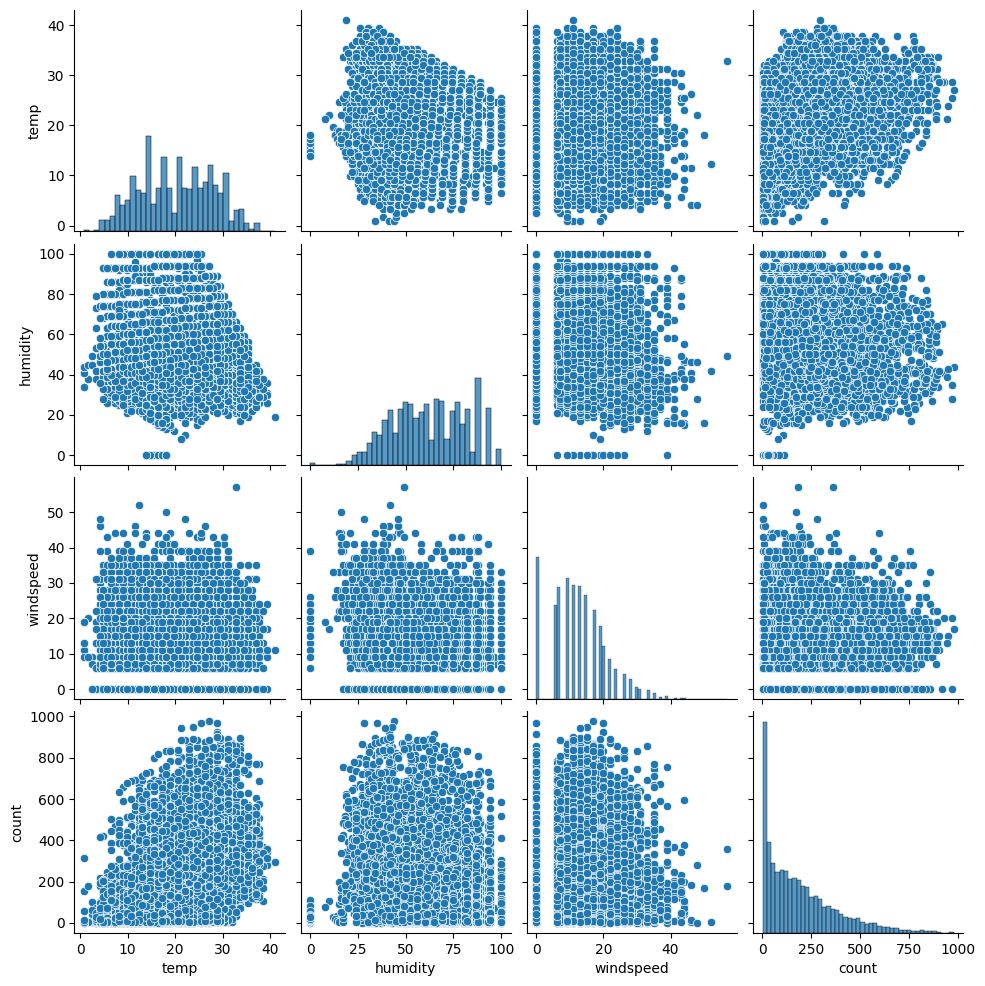

In [58]:
sns.pairplot (df, vars = ['temp', 'humidity', 'windspeed', 'count'])
plt.show()

**Comments on EDA**

**Comments Univariate Data Analysis**

**Continuous Variables**

**temp and atemp:**

Both are normally distributed with slight right skew.
atemp (feels-like temperature) is closely aligned with temp, indicating strong
correlation.
No significant outliers.

**humidity:**

Appears left-skewed (most values are on the higher side).
Shows a concentration around 60–90%, indicating generally humid conditions.
A few low humidity readings could be natural or need review.

**windspeed:**

Distribution is right-skewed, with many low wind speed values.
Spikes at zero or near-zero may indicate sensor or data issues (common in bike
rental datasets).
Some higher wind values are rare but expected.

**casual, registered, count:**

All show right-skewed distributions, indicating most hours have low rental
counts.
registered users dominate over casual, which is typical for utility-based bike
sharing.
Some extreme high counts in count could be peak usage hours

Comments on Categorical Data

**Weather** - Clear weather shows highest demand followed by cloud and light
rain. But during thunderstorm demands gets very low

**Season** - Summer, fall and winter equally generates revenue. But during spring
this demand gets lower

**Workingday** - On working day demand is highest

**Windspeed** - When windspeed is low then demand is highest . When windspeed
crosses 40 demands become very low

**Comments Bivariate Data Analysis**

**1. Season vs Count**

Fall (Season 3) appears to have the highest bike counts on average.
Spring (1) and Winter (4) show relatively lower counts, possibly due to less
favorable weather.
This trend suggests seasonality plays a major role in user behavior, especially for
casual users.
Actionable Insight: Promote more rides during off-peak seasons through
discounts.

**2. Holiday vs Count**

Non-holidays (0) have higher average counts, particularly due to high registered
user usage on workdays.
Holidays (1) show increased casual user activity but overall lower total counts.

Interpretation: Holidays attract casual riders (leisure), while workdays support
routine use.

Actionable Insight: Tailor holiday promotions toward casual users or tourists.

**3. Workingday vs Count**

Working days (1) see much higher registered user counts (commute-related
behavior).
Non-working days (0) see more casual rides, though the total is lower than
workdays.
Clear pattern of usage split between functional use (weekdays) and recreational
use (weekends).
This variable is crucial for any demand prediction or forecasting model.

**4. Weather vs Count**

Clear weather (1) has highest rental counts, which is intuitive.
Cloudy weather (2) sees a slight dip in activity but still moderate use.
Light rain (3) and especially Thunderstorm (4) cause a significant drop in usage.

Insight: Bike rentals are highly sensitive to bad weather—likely due to safety and comfort.
For operational planning: consider reducing fleet or adding weather-based
dynamic pricing on rainy days.

**Range and Outlier Analysis**

The values in your dataset mostly look normal and fall within expected limits.

**Temperature (temp)**

usually stays between 0°C and 40°C, which makes sense for different weather
conditions. The feels-like temperature (atemp) is very similar to actual
temperature, just a bit higher.

**Humidity**

goes from 0% to 100%. This is the full possible range, but values like 0% or
100% are rare in real life. So, those could be unusual or maybe incorrect
readings.

**Windspeed**

is mostly low, but sometimes it jumps very high (above 50 km/h), which is a bit
suspicious. Also, some rows show windspeed as 0, which might mean the sensor
didn’t record anything at that time.

**The number of users –**

casual, registered, and the total count – is usually low in most hours, but
sometimes it goes really high. These high values are likely real and happen
during busy hours like mornings or evenings. But since they are far from the
usual numbers, we call them outliers. They're not mistakes, just extreme values.
For the category columns like season, holiday, workingday, and weather, all the
values are valid. But in some of them, certain categories appear much more
often. For example, there are more non-holidays than holidays, and more clear
weather days than rainy ones. So, comparisons across these categories should
be made carefully

**Comments on Distribution of Variables**

The temperature (temp) and feels-like temperature (atemp) follow a smooth,
bell-shaped curve, meaning most of the time the weather is moderate, and very
hot or very cold conditions are rare.
Humidity is often high in the data. Many values are above 60%, meaning the air
is usually quite humid. A few very low values appear but are not common.
Windspeed is usually low, with most values near zero. A few higher values show
up occasionally, but they’re rare.
The number of bike users — casual, registered, and total count — is skewed to
the right. This means there are many hours with low usage and a few hours with
very high usage (like during rush hours). The counts aren’t evenly spread out.
Categorical variables like season, holiday, workingday, and weather are not
evenly distributed. For example, clear weather and non-holiday days appear
more often than other types.

# **Hypothesis Testing**

## **2 Sample T Test**

In [59]:
## 2 sample T Test to check working days has impact on number of electric cy
# Load dataset
df2 = pd.read_csv("bike_sharing.txt")
# Separate data
workingday_counts = df2[df2['workingday'] == 1]['count']
non_workingday_counts = df2[df2['workingday'] == 0]['count']
# Perform 2-sample t-test (assuming unequal variance)
t_stat, p_val = ttest_ind(workingday_counts, non_workingday_counts,)
# Output
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
# Interpret
if p_val < 0.05:
 print("Reject the null hypothesis: Working day has a significant effect of working day onrentals.")
else:
 print("Fail to reject the null hypothesis: No significant effect of working day onrentals.")

T-statistic: 1.2096
P-value: 0.2264
Fail to reject the null hypothesis: No significant effect of working day onrentals.


# Annova Test

In [60]:
# Get the count value for each weather group
clear_valuecount = df[df['weather'] == 'Clear']['count'].values
cloudy_valuecount = df[df['weather'] == 'Cloudy']['count'].values
light_rain_valuecount = df[df['weather'] == 'Light_Rain']['count'].values
thunderstorm_valuecount = df[df['weather'] == 'Thunderstorm']['count'].values
# One way annova test on weather
anova_stat,p_value = f_oneway(clear_valuecount,cloudy_valuecount,light_rain_valuecount,thunderstorm_valuecount)
# Output
print(f"F-statistic: {anova_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_val < 0.05:
 print("Reject the null hypothesis: Working day has a significant effect of working day onrentals.")
else:
 print("Fail to reject the null hypothesis: No significant effect of working day onrentals.")

F-statistic: 65.5302
P-value: 0.0000
Fail to reject the null hypothesis: No significant effect of working day onrentals.


In [61]:
# Annova test to check number of cycles rented is similar or different in di
# Get teh count value for each season group
spring_valuecount = df[df['season'] == 'Spring']['count'].values
summer_valuecount = df[df['season'] == 'Summer']['count'].values
fall_valuecount = df[df['season'] == 'Fall']['count'].values
winter_valuecount = df[df['season'] == 'Winter']['count'].values
# One way annova test on season
annova_stat,p_value = f_oneway(spring_valuecount,summer_valuecount,fall_valuecount,winter_valuecount)
# Output
print(f"F-statistic: {annova_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
 print("Reject the null hypothesis: Season has a significant effect on rentals.")
else:
 print("Fail to reject the null hypothesis: No significant effect of seasons.")

F-statistic: 236.9467
P-value: 0.0000
Reject the null hypothesis: Season has a significant effect on rentals.


# Chi Square Test

In [62]:
## ChiSquare Test to compare relation between season and weather
# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

In [63]:
stat,p_value,dof,expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
 print("Reject the null hypothesis: There is a significant association between season and weather.")
else:
 print("Fail to reject the null hypothesis: There is a significant association between season and weather.")

Chi-square statistic: 49.1587
P-value: 0.0000
Reject the null hypothesis: There is a significant association between season and weather.


# Suggestions Based on Analysis

1.Keep more Yulu cycles ready when the weather is good, as more people use them then.

2.Add extra cycles in high-demand seasons and reduce during low-demand times.

3.Offer discounts or offers on holidays to increase usage.

4.Give passes or special plans for office-goers who ride on working days.

5.Make sure cycles are available during busy hours like morning and evening.

6.Add more stations in areas where people want to ride but cycles are not available.

7.Send alerts in the app when the weather is perfect for a ride.

8.Use past data to predict when and where more cycles will be needed.

9.Improve charging and battery swap systems so cycles are always ready.

10.Group users by habits and give offers that match their usage style.
